## TASK 4 : Handwritten digit recognition

## Author : Loka Akash Reddy

## Task Details:
### Predict handwritten digits with MNIST image dataset

## Dataset:
### https://www.kaggle.com/dillsunnyb11/digit-recognizer/tasks

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading data in pandas DataFrame

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

### Exploring Data

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(42000, 785)

### In this:
1. Training Dataset have 42000 rows and 785 columns.

2. Each column represent the pixel value of digit.

In [6]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.shape

(28000, 784)

### In this:
1. Test Dataset have 28000 rows and 784 columns.

2. Each column represent the pixel value of handwritten digit.

In [10]:
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


### Heatmaps

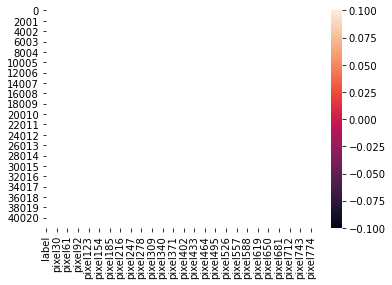

In [12]:
sns.heatmap(df_train.isnull());
plt.show();

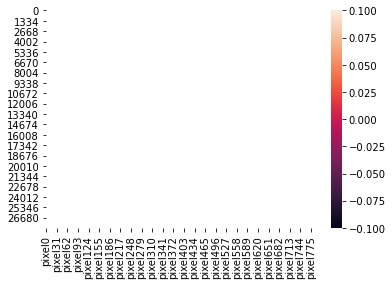

In [13]:
sns.heatmap(df_test.isnull());
plt.show();

No Missing Values

### Let's check value count of each digit in the training dataset

In [14]:
df_train['label'].value_counts().sort_values(ascending = False)  #to get count of every digit

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Training Dataset have more images of 1 than any other digit.

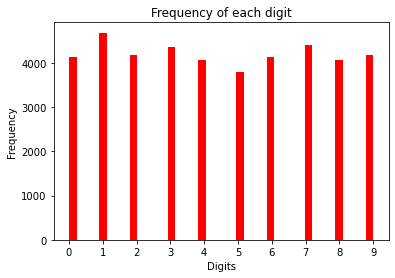

In [15]:
plt.hist(df_train['label'], bins = 40, color = "Red")
plt.xlabel("Digits")
plt.xticks(df_train.label.unique())
plt.ylabel("Frequency")
plt.title("Frequency of each digit")
plt.show();

### Function to print Image

In [16]:
def print_image(index):
    random_digit = df_train.iloc[index,1:].values
    random_digit_img = random_digit.reshape(28,28)
    plt.imshow(random_digit_img,'binary')

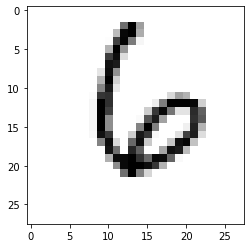

In [17]:
print_image(1906)

### Build the Model

In [18]:
X_train = df_train.iloc[:,1:]
Y_train = df_train.iloc[:,0]

In [19]:
from sklearn.model_selection import train_test_split

# splitting data in training set(80%) and test set(20%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,max_features=0.5)
                                     
model = model.fit(x_train,y_train)

In [21]:
predicted = model.predict(x_test)
predicted

array([0, 1, 0, ..., 1, 5, 4], dtype=int64)

In [22]:
predicted.shape

(8400,)

### Training accuracy

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

act = accuracy_score(y_train,model.predict(x_train))
print('Training Accuracy is: ',(act*100))

Training Accuracy is:  100.0


### Testing accuracy

In [24]:
act = accuracy_score(y_test,model.predict(x_test))
print('Test Accuracy is: ',(act*100))

Test Accuracy is:  95.97619047619048


In [25]:
confusion_matrix(predicted,y_test)

array([[809,   0,   5,   2,   2,   4,   5,   1,   1,   3],
       [  0, 958,   0,   2,   2,   2,   4,   8,  10,   2],
       [  0,   5, 806,  10,   3,   0,   3,   9,   5,   2],
       [  0,   3,   9, 783,   0,   8,   0,   0,   7,   9],
       [  1,   2,   4,   0, 774,   3,   2,   2,   3,  16],
       [  0,   1,   1,  16,   0, 736,   4,   0,   1,   4],
       [  3,   3,   5,   3,   4,   4, 809,   0,   3,   2],
       [  0,   2,   8,   8,   1,   0,   0, 847,   1,   5],
       [ 11,   1,   1,  13,   1,   5,   3,   3, 752,   9],
       [  1,   0,   0,   5,  15,   4,   0,  15,  13, 788]], dtype=int64)

In [26]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       832
           1       0.98      0.97      0.98       988
           2       0.96      0.96      0.96       843
           3       0.93      0.96      0.94       819
           4       0.97      0.96      0.96       807
           5       0.96      0.96      0.96       763
           6       0.97      0.97      0.97       836
           7       0.96      0.97      0.96       872
           8       0.94      0.94      0.94       799
           9       0.94      0.94      0.94       841

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [27]:
y_test.values

array([0, 1, 0, ..., 1, 5, 4], dtype=int64)

In [28]:
y_test[7:12]

6057     8
6764     4
28479    7
36068    7
16415    8
Name: label, dtype: int64

In [29]:
predicted[7:12]

array([8, 4, 7, 7, 8], dtype=int64)

In [30]:
test_data_prediction = model.predict(df_test)
test_data_prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [31]:
df_test.shape

(28000, 784)

### Function to print Image

In [32]:
def print_testimage(index):
    random_digit = df_test.iloc[index].values
    random_digit_img = random_digit.reshape(28,28)
    plt.imshow(random_digit_img,'binary')

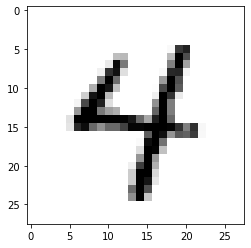

In [33]:
print_testimage(32)

In [36]:
#The 32th value of predict data
test_data_prediction[32]

4